# Exercise 3: Linear Regression




In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf

from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Part 1: Synthetic Data

In this part you will use mathematical formulas to get coefficients and compare results with built-in function of Scikit-learn. Please follow the steps below.

1) Generate the data for a population line y=2+3 x + e; the feature X takes values from -2 to 2 and the error (e) is modeled as normal (Gaussian) distribution with zero mean and unit variace (check numpy.random.normal method to generate e). (i) Generate 100 data samples, (ii) plot the data (y vs x), and (iii) split the data into train and test (feel free to use the built in function for splitting). 

2) Then, assume that we don't know the actual model now but only have the data. Use the train data to find the coefficients of the Linear regression model using the mathematical formula derived for each. 

3) Now use the built-in scikit-learn function for linear regression to fit a linear regression model. Find the coefficients and compare coafficients with previous part as well as with the actual coefficient values. 

4) Run the above steps several times. Do coefficients' estimates change? Why?

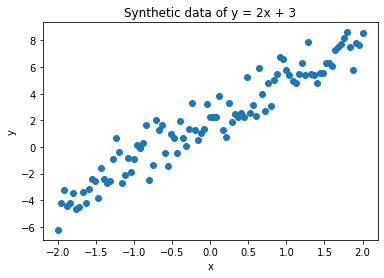

In [2]:
beta0 = 2
beta1 = 3

num_samples = 100

x_0 = -2
x_n = 2
width = (x_n - x_0) / num_samples

y = []
x = []

for i in range(0, num_samples + 1):
    error = np.random.normal()
    x_i = x_0 + i * width
    y_i = beta0 + beta1 * x_i + error
    
    x.append(x_i)
    y.append(y_i)
    
plt.scatter(x, y)
plt.title('Synthetic data of y = 2x + 3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=0)

y_bar = mean(Y_train)
x_bar = mean(X_train)

sum1 = 0
sum2 = 0

for x_val, y_val in zip(X_train, Y_train):
    sum1 += (y_val - y_bar) * (x_val - x_bar)
    sum2 += (x_val - x_bar) ** 2

beta1_hat = sum1 / sum2
beta0_hat = y_bar - beta1_hat * x_bar
    
print(beta0_hat)
print(beta1_hat)

1.9725903216631755
2.981541312743943


In [4]:
X_train = np.array(X_train).reshape(-1, 1)
Y_train = np.array(Y_train).reshape(-1, 1)
linreg = LinearRegression().fit(X_train, Y_train)

print('Intercept: ', linreg.intercept_)
print('Coefficient: ', linreg.coef_[0])

Intercept:  [1.97259032]
Coefficient:  [2.98154131]


**(AP)**: Some of the coefficient estimates I saw:

B_0_hat = 1.82, B_1_hat = 3.04

B_0_hat = 1.97, B_1_hat = 2.93

B_0_hat = 1.80, B_1_hat = 3.03

The coefficient estimates change because of the variance in the error when generating the synthetic data. 

## Part 2: Advertising Data Set
In this exercise we will fit a linear regression model using using statsmodels and scikit-learn (or your own function). Using statsmodels you will be able to get the statistical tests and significance of the features. 

#### A) Using the advertising data, use the statsmodel to fit an OLS model that predicts the sales using features (TV, Radio and Newspaper). Print the p-values and confidence interval of features. 



In [5]:
df = pd.read_csv('advertising.csv')

model = smf.ols('Sales ~ TV+Radio+Newspaper', df)
fitting_results = model.fit()

print(fitting_results.summary().tables[1])
print('\n')
print('p-values are:\n', fitting_results.pvalues)
print('\n')
print('confidence intervals are:\n', fitting_results.conf_int(alpha=0.05, cols=None))

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011


p-values are:
 Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64


confidence intervals are:
                   0         1
Intercept  2.323762  3.554016
TV         0.043014  0.048516
Radio      0.171547  0.205513
Newspaper -0.012616  0.010541


#### B) Repeat  question (A) without the Radio feature. Comment on results (A) and (B). What do the results imply? 

In [6]:
model = smf.ols('Sales ~ TV+Newspaper', df)
fitting_results = model.fit()

print(fitting_results.summary().tables[1])
print('\n')
print('p-values are:\n', fitting_results.pvalues)
print('\n')
print('confidence intervals are:\n', fitting_results.conf_int(alpha=0.05, cols=None))

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064


p-values are:
 Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64


confidence intervals are:
                   0         1
Intercept  4.738940  6.810956
TV         0.041812  0.051991
Newspaper  0.024155  0.064284


**(AP)**: Since the confidence interval for newspaper in Part A contains 0, and since its p-value is very high, it likely does not impact sales.

#### C) In this part you can use the Scikit-Learn library or your own defined function. Use only the TV and Radio advertising features. Fit a linear regression model using advertising trianing set, then find and print the test mean square error (MSE)  and the $R^2$ score of the fitted model. Use random_state= 0 in the train_test_split function.

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['TV', 'Radio', 'Newspaper']], df['Sales'], random_state = 0)

linreg = LinearRegression().fit(X_train, Y_train)

pred = linreg.predict(X_test)

print('Test MSE: %.2f' % mean_squared_error(pred, Y_test))
print('R^2 score: %.2f' % r2_score(pred, Y_test))

Test MSE: 4.01
R^2 score: 0.84
